In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler

In [88]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [89]:
over = RandomOverSampler()
X, y = over.fit_resample(X, y)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [90]:
len(transformed_df[transformed_df["Outcome"]==1]), len(transformed_df[transformed_df["Outcome"]==0])

(500, 500)

In [91]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [92]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(16, activation='relu'), # if x <= 0 --> 0, x > 0 --> x
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

In [93]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [94]:
model.evaluate(X_train, y_train)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5771 - loss: 0.6951   


[0.6951159834861755, 0.5666666626930237]

In [95]:
model.evaluate(X_valid, y_valid)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5760 - loss: 0.7318 


[0.7286570072174072, 0.574999988079071]

In [96]:
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6082 - loss: 0.6802 - val_accuracy: 0.6450 - val_loss: 0.6563
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7082 - loss: 0.6128 - val_accuracy: 0.6950 - val_loss: 0.6138
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6972 - loss: 0.5891 - val_accuracy: 0.7150 - val_loss: 0.5787
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7467 - loss: 0.5377 - val_accuracy: 0.7100 - val_loss: 0.5526
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7082 - loss: 0.5558 - val_accuracy: 0.7250 - val_loss: 0.5346
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7212 - loss: 0.5342 - val_accuracy: 0.7350 - val_loss: 0.5244
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7231 - loss: 0.5409 - val_accuracy: 0.7500 - val_loss: 0.5147
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7325 - loss: 0.5298 - val_accuracy: 0.7350 - val_loss:

In [97]:
model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8115 - loss: 0.4616 


[0.47945427894592285, 0.7900000214576721]

In [98]:

dfb = pd.read_csv('Titanic-Dataset.csv')
dfb.head()
dfb[['Pclass','Sex','Age','Fare','Survived']].describe()

,Pclass,Age,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000
mean,2.308642,29.699118,32.204208,0.383838
std,0.836071,14.526497,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000
25%,2.000000,20.125000,7.910400,0.000000
50%,3.000000,28.000000,14.454200,0.000000
75%,3.000000,38.000000,31.000000,1.000000
max,3.000000,80.000000,512.329200,1.000000


In [99]:
dfb = dfb[['Pclass','Sex','Age','Fare','Survived']]

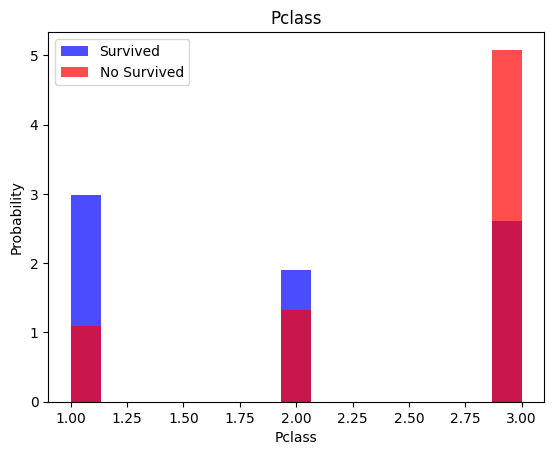

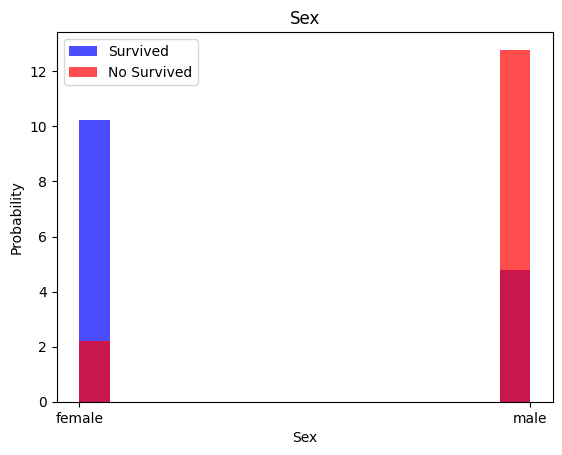

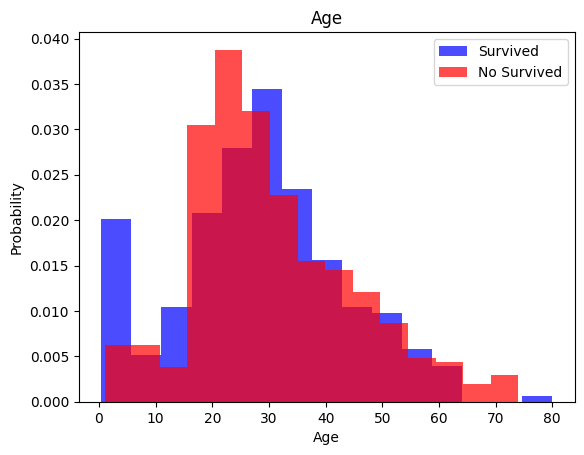

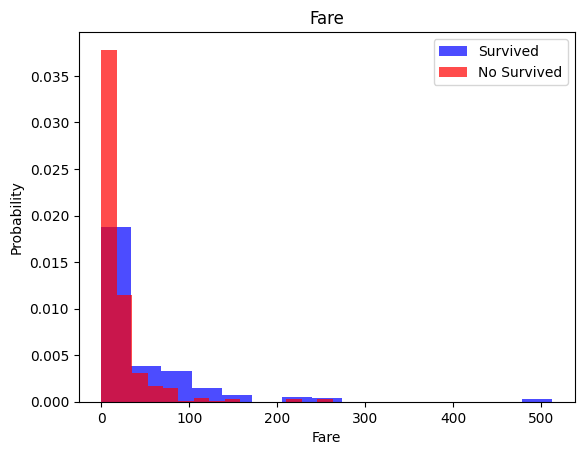

In [100]:
for i in range(len(dfb.columns[:-1])):
  label = dfb.columns[i]
  plt.hist(dfb[dfb['Survived']==1][label], color='blue', label="Survived", alpha=0.7, density=True, bins=15)
  plt.hist(dfb[dfb['Survived']==0][label], color='red', label="No Survived", alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [181]:
target = dfb['Survived']
inputs = dfb.drop('Survived', axis=1)
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [182]:
dumnies = pd.get_dummies(inputs.Sex,dtype=int)
dumnies.head()
inputs = pd.concat([inputs,dumnies],axis=1).drop('Sex', axis=1)
scaler = StandardScaler()
inputs[['Fare', 'Age']] = scaler.fit_transform(inputs[['Fare', 'Age']])
inputs

,Pclass,Age,Fare,female,male
0,3,-0.592481,-0.502445,0,1
1,1,0.638789,0.786845,1,0
2,3,-0.284663,-0.488854,1,0
3,1,0.407926,0.420730,1,0
4,3,0.407926,-0.486337,0,1
...,...,...,...,...,...
886,2,-0.207709,-0.386671,0,1
887,1,-0.823344,-0.044381,1,0
888,3,0.000000,-0.176263,1,0
889,1,-0.284663,-0.044381,0,1


In [183]:
X_train, X_temp, y_train, y_temp = train_test_split(inputs, target, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [187]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(8, activation='sigmoid'),
                             tf.keras.layers.Dense(8, activation='sigmoid'),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

In [197]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [200]:
model.evaluate(X_train, y_train)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7916 - loss: 0.4689 


[0.4817565381526947, 0.795880138874054]

In [199]:
model.evaluate(X_valid, y_valid)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7598 - loss: 0.5249 


[0.5064712762832642, 0.7808988690376282]

In [201]:
model.fit(X_train, y_train, batch_size=15, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7613 - loss: 0.4996 - val_accuracy: 0.7753 - val_loss: 0.4910
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7779 - loss: 0.4776 - val_accuracy: 0.7753 - val_loss: 0.4860
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8072 - loss: 0.4384 - val_accuracy: 0.7472 - val_loss: 0.5032
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7633 - loss: 0.5063 - val_accuracy: 0.7528 - val_loss: 0.4980
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8150 - loss: 0.4333 - val_accuracy: 0.7584 - val_loss: 0.5020
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8011 - loss: 0.4459 - val_accuracy: 0.7472 - val_loss: 0.4871
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8061 - loss: 0.4485 - val_accuracy: 0.7584 - val_loss: 0.4935
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7945 - loss: 0.4483 - val_accuracy: 0.7472 - val_loss

In [205]:
model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7904 - loss: 0.4192 


[0.41630882024765015, 0.7932960987091064]

### Conclusion de l'Étude sur la Prédiction de la Survie des Passagers du Titanic

Dans cette étude, nous avons exploré l'utilisation d'un réseau de neurones pour prédire la survie des passagers du Titanic en nous basant sur les caractéristiques suivantes : sexe, âge, tarif du billet, et classe de voyage (`pclass`).

1. **Performance du Modèle** :
   - Le réseau de neurones a atteint une précision (accuracy) d'environ 79 % sur l'ensemble de test, ce qui est comparable aux résultats obtenus avec d'autres méthodes comme Naive Bayes dans notre étude précédente.
   - La perte (loss) sur l'ensemble de test est de 0,4192, indiquant un bon ajustement du modèle aux données.

2. **Optimisation des Hyperparamètres** :
   - Plusieurs essais ont été effectués pour déterminer le nombre optimal de couches et de neurones dans le réseau.
   - Le taux d'apprentissage initial de 0,001 a été ajusté pour améliorer la performance du modèle, ce qui a conduit à une meilleure convergence.

3. **Prétraitement des Données** :
   - La standardisation des caractéristiques `age` et `fare` a été cruciale en raison de la grande disparité dans leurs valeurs. Cela a permis au modèle de mieux apprendre les relations sous-jacentes dans les données.

4. **Comparaison avec d'autres Méthodes** :
   - Bien que la précision obtenue soit similaire à celle de Naive Bayes, le réseau de neurones a nécessité plus d'ajustements et de temps pour atteindre cette performance.
   - Cela souligne l'importance de l'optimisation des hyperparamètres et du prétraitement des données dans les modèles de réseaux de neurones.

5. **Considération Future** :
   - L'intégration de caractéristiques supplémentaires ou l'ingénierie de nouvelles caractéristiques pourrait également améliorer la performance du modèle.

En conclusion, cette étude démontre que les réseaux de neurones peuvent être efficaces pour la prédiction, avec condition que les données soient correctement prétraitées et que les hyperparamètres soient soigneusement ajustés.